In [60]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the csv file
df = pd.read_csv(".././docs/csv/results.csv")
df2 = pd.read_csv(".././docs/csv/results2.csv")

In [61]:
# for unique value in df[0]
x = df['label'].unique()

unique_df = {}

for value in x:
    # Filter the original DataFrame to get the rows with the current unique value
    new_df = df[df['label'] == value]
    
    # compute mean and standard deviation
    new_df = new_df.sort_values(by=['size'])
    new_df = new_df.groupby(['size']).agg({'time': ['mean', 'std']})
    new_df.columns = ['time', 'std']
    new_df = new_df.reset_index()
    
    # Store the new DataFrame in the dictionary with the unique value as the key
    unique_df[value] = new_df

unique_df

{'python':     size        time       std
 0      1    0.000000  0.000000
 1      2    0.000000  0.000000
 2      4    0.000000  0.000000
 3      8    0.000183  0.000408
 4     16    0.000864  0.000454
 5     32    0.005648  0.002063
 6     64    0.048004  0.006445
 7    128    0.366891  0.025504
 8    256    2.873940  0.025432
 9    512   24.524437  0.295540
 10  1024  221.705985  1.308298,
 'O0':     size     time       std
 0      1   0.0000  0.000000
 1      2   0.0000  0.000000
 2      4   0.0000  0.000000
 3      8   0.0000  0.000000
 4     16   0.0000  0.000000
 5     32   0.0000  0.000000
 6     64   0.0008  0.000837
 7    128   0.0068  0.000837
 8    256   0.0556  0.003782
 9    512   0.4158  0.021123
 10  1024  22.7862  0.709160,
 'O1':     size     time       std
 0      1   0.0000  0.000000
 1      2   0.0000  0.000000
 2      4   0.0000  0.000000
 3      8   0.0000  0.000000
 4     16   0.0000  0.000000
 5     32   0.0000  0.000000
 6     64   0.0002  0.000447
 7    128   

In [62]:
def plot_df(label):
    plt.title(f'DGEMM execution time in {label}')
    plt.xlabel('Matrix Size (N x N)')
    plt.ylabel('Time (seconds)')
    plt.errorbar(unique_df[label]['size'], unique_df[label]['time'], yerr=unique_df[label]['std'], label=label)
    plt.show()

In [63]:
def plot_speedup(label_n, label_1):
    # compute the speedup
    df_speedup = unique_df[label_1].copy()
    df_speedup['time'] = unique_df[label_n]['time'] / unique_df[label_1]['time']
    df_speedup['std'] = df_speedup['time'] * np.sqrt((unique_df[label_n]['std'] / unique_df[label_n]['time'])**2 + (unique_df[label_1]['std'] / unique_df[label_1]['time'])**2)

    # plot the speedup graph
    plt.title('DGEMM speedup in C over Python')
    plt.xlabel('Matrix Size (N x N)')
    plt.ylabel('Speedup')
    plt.errorbar(df_speedup['size'], df_speedup['time'], yerr=df_speedup['std'], label='speedup')
    plt.show()

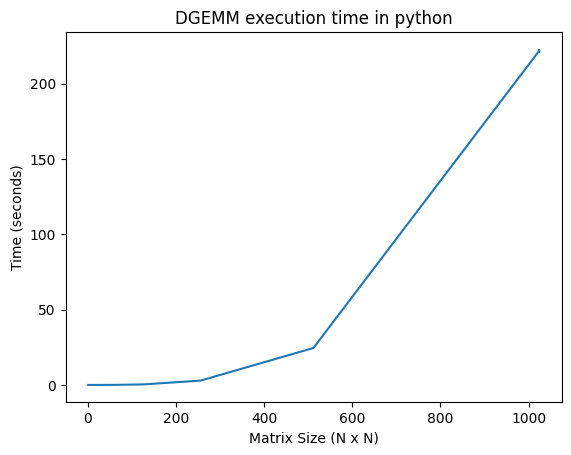

In [64]:
plot_df('python')

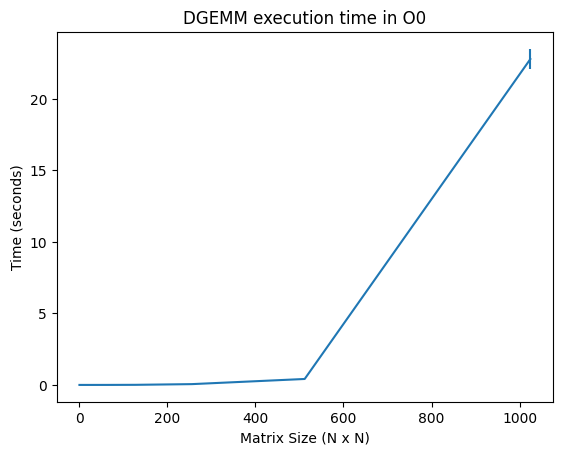

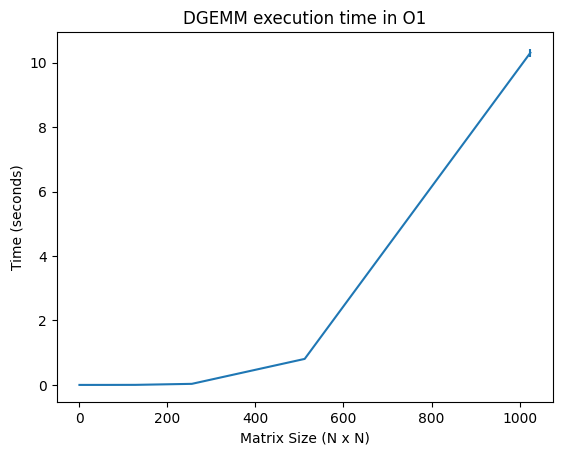

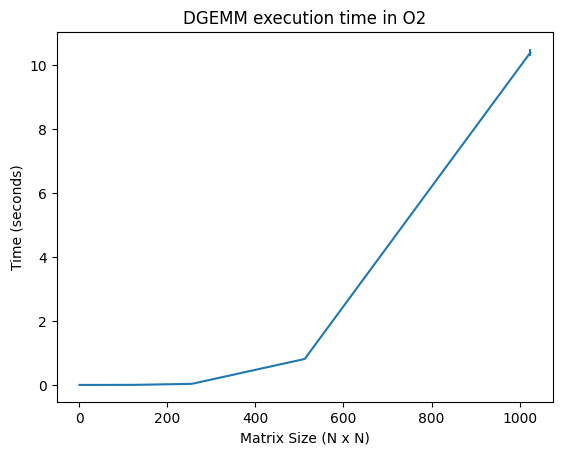

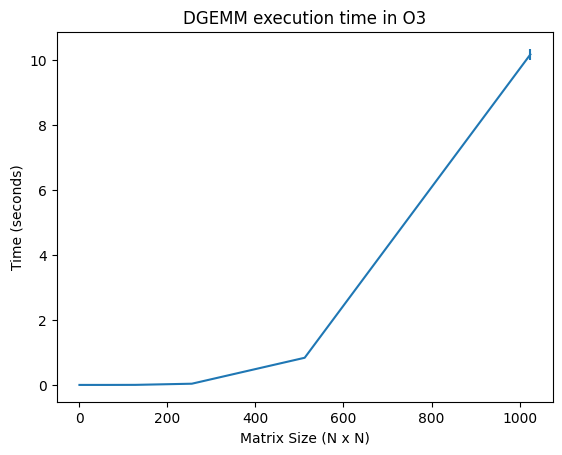

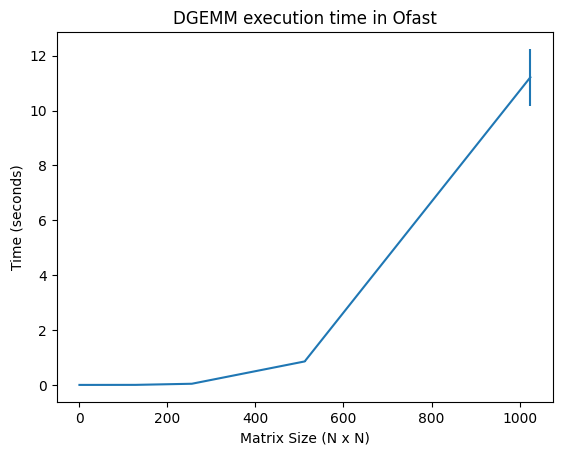

In [65]:
plot_df('O0')
plot_df('O1')
plot_df('O2')
plot_df('O3')
plot_df('Ofast')

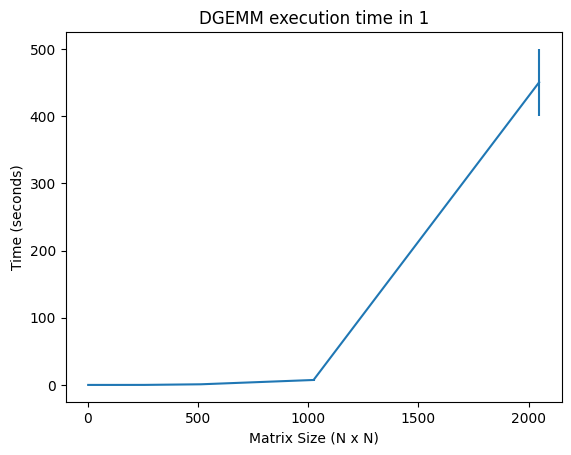

In [66]:
plot_df('1')

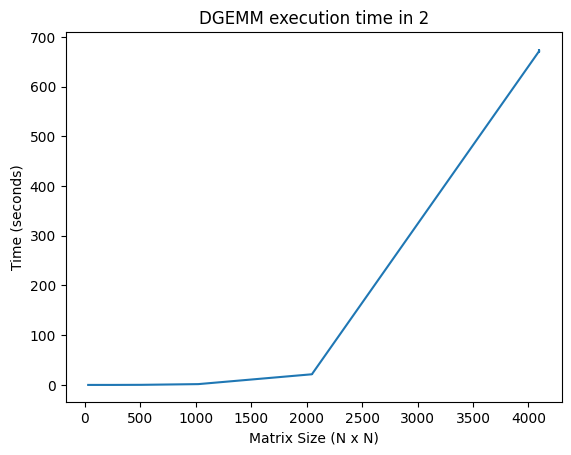

In [67]:
plot_df('2')

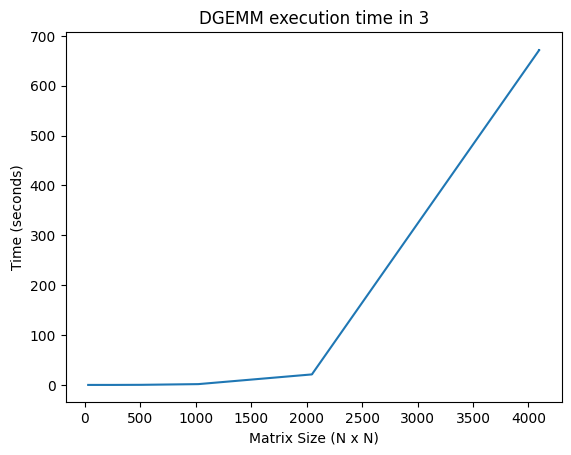

In [68]:
plot_df('3')